In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import display, clear_output
import time

In [2]:
np.random.seed(333)

In [3]:
random_1 = np.random.randn(2,100)

##### Want a shape thats (N,2)

In [4]:
random_1.shape

(2, 100)

In [5]:
random_2 = np.random.randn(2,100) + 2

In [6]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

In [7]:
random_stack = np.hstack([random_1, random_2])

In [8]:
# fix the centers to a poor initial guess
centers = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
#minval, maxval = min(random_stack[0]), max(random_stack[0])
#np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

In [9]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

In [10]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

In [11]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [12]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]


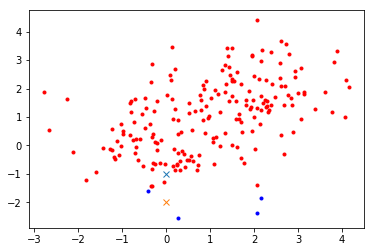

0


In [13]:
iterat = 0
fig, ax = plt.subplots()
l1 = ax.plot(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0],
            np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], 'r.')
l2 = ax.plot(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0],
            np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], 'b.')

l3 = ax.plot(centers[0,0], centers[0,1],'x')

l4 =  ax.plot(centers[1,0], centers[1,1],'x')

display(fig)

while (not (centers == newc).all()) or iterat > 10:
    print(iterat)
    centers = newc


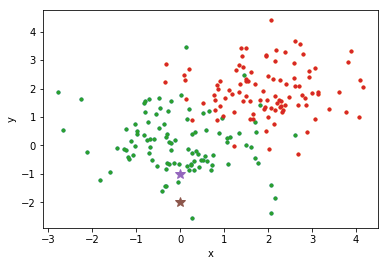

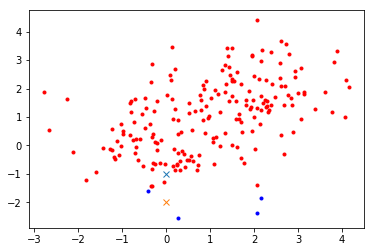

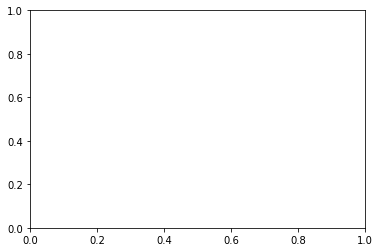

array([ 0.96972306,  1.06522176])

In [14]:
iterat = 0
fig, ax = plt.subplots()
#l1 = ax.plot(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0],
            #np.hstack([random_1[:, cl1], random_2[:, cl2]])[1], 'r.')
#l2 = ax.plot(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0],
            #np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1], 'b.')

#l3 = ax.plot(centers[0,0], centers[0,1],'x')

#l4 =  ax.plot(centers[1,0], centers[1,1],'x')

#display(fig)

while (not (centers == newc).all()) or iterat > 10:
    print(iterat)
    centers = newc
    
    l1.set_data(np.hstack([random_1[:, cl1], random_2[:, cl2]])[0],
                np.hstack([random_1[:, cl1], random_2[:, cl2]])[1])

    l2.set_data(np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[0],
               np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]])[1])
    
    l3.set_data(centers[0,0], centers[1,1])
    
    l4.set_data(centers[1,0], centers[1,1])
    
    display(fig)
    
    cl1 = dismetric(random_1[0], random_1[1]), centers[0] < dismetric(random_1[0], random_1[1], centers[1])
    cl2 = dismetric(random_2[0], random_2[1]), centers[0] < dismetric(random_2[0], random_2[1], centers[1])
    
    newc = np.array([np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis = 1),
                    np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis =1)])
    print(centers, newc)
    iterat += 1


plt.show()
newc[0]